<a href="https://colab.research.google.com/github/MehulLuthra/AdvanceMaths/blob/main/advanceMaths_102317146.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shrutibhargava94/india-air-quality-data")

print("Path to dataset files:", path)

100%|██████████| 5.22M/5.22M [00:00<00:00, 132MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shrutibhargava94/india-air-quality-data/versions/1


In [6]:
import os

path = "/root/.cache/kagglehub/datasets/shrutibhargava94/india-air-quality-data/versions/1"
os.listdir(path)


['data.csv']

In [7]:
import pandas as pd

df = pd.read_csv(
    "/root/.cache/kagglehub/datasets/shrutibhargava94/india-air-quality-data/versions/1/data.csv",
    encoding="latin1"
)

df.head()


/tmp/ipython-input-1740621931.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [8]:
r = 102317146
ar = 0.05 * (np.mod(r,7))
br = 0.3 * (np.mod(r,5) + 1)

In [9]:
print(f'{ar.item()}, {br.item()}')

0.05, 0.6


In [10]:
x = df['no2'].dropna().values
x

array([17.4,  7. , 28.5, ..., 45. , 50. , 46. ])

In [11]:
z_df = x + ar * np.sin(br * x)
z_df

array([17.35752012,  6.95642121, 28.45079675, ..., 45.0478188 ,
       49.95059842, 46.03121886])

In [12]:
mu = np.mean(z_df)
sigma = np.std(z_df)
lambda_para = 1 / (2 * np.square(sigma))
const = 1 / (sigma * np.sqrt(2 * np.pi))

In [13]:
p_z = const * np.exp( -lambda_para * np.square(z_df - mu))
p_z

array([0.01942475, 0.01282946, 0.02134278, ..., 0.01255845, 0.00920538,
       0.01186653])

In [14]:
mu.item()

25.810230670014192

In [15]:
sigma.item()

18.50275555664545

In [16]:
lambda_para.item()

0.0014604852717727988

In [17]:
const.item()

0.02156123606454654

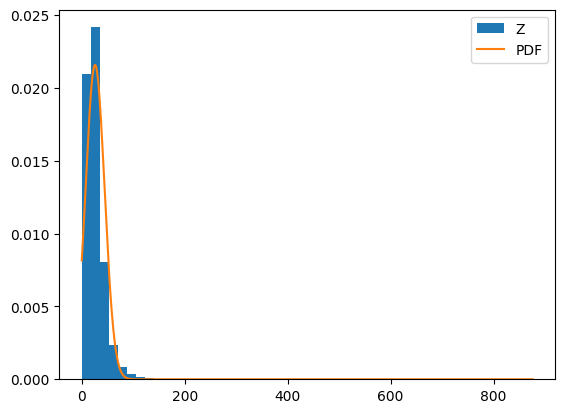

In [18]:
plt.hist(z_df, bins=50, density=True, label='Z')
x = np.linspace(z_df.min(), z_df.max(), 1000)
y = const * np.exp(-lambda_para * (x - mu)**2)
plt.plot(x, y, label='PDF')
plt.legend()
plt.show()